Time Series analysis with Temperature Data

Importing the data and the necessary packages

In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('weather-complete.csv')

In [2]:
df

,date,temperature
0,2012-10-01,11.036840
1,2012-10-02,14.340558
2,2012-10-03,14.518382
3,2012-10-04,16.820351
4,2012-10-05,16.948431
...,...,...
1881,2017-11-25,19.104600
1882,2017-11-26,8.918791
1883,2017-11-27,12.347427
1884,2017-11-28,18.310507


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1886 entries, 0 to 1885
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1886 non-null   object 
 1   temperature  1885 non-null   float64
dtypes: float64(1), object(1)
memory usage: 29.6+ KB


Exploratory Data Analysis

In [6]:
df['temperature']=df['temperature'].fillna(value=np.mean(df['temperature']))

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1886 entries, 0 to 1885
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1886 non-null   object 
 1   temperature  1886 non-null   float64
dtypes: float64(1), object(1)
memory usage: 29.6+ KB


Converting into Time datatype

In [8]:
df['date']=pd.to_datetime(df['date'])

Converting into Time-Series Data

In [10]:
ts_data = df.set_index(['date'])

In [11]:
import matplotlib.pyplot as plt

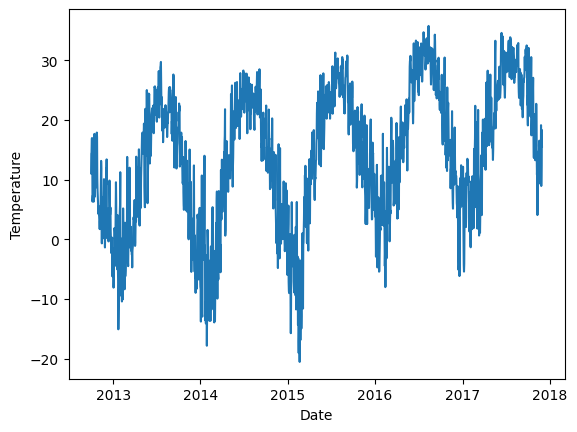

In [12]:
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.plot(ts_data)

Finding the rolling mean and standard deviation

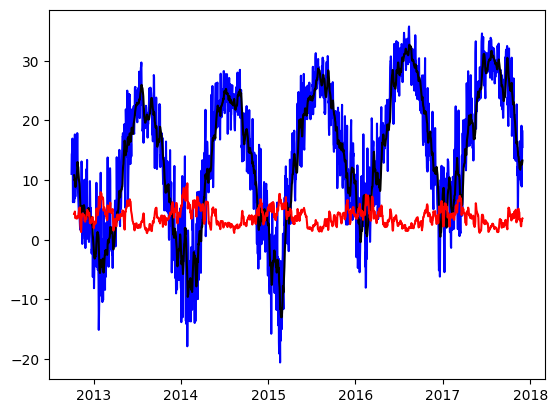

In [13]:
rol_mean = ts_data.rolling(window=12).mean()
rol_std = ts_data.rolling(window=12).std()

plt.plot(ts_data, c='blue')
plt.plot(rol_mean, c='black')
plt.plot(rol_std, c='red')

ADF Test

In [14]:
from statsmodels.tsa.stattools import adfuller
dftest= adfuller(ts_data['temperature'])
print(dftest)

(-2.0347663537379472, 0.27154030957286956, 19, 1866, {'1%': -3.4338592810961988, '5%': -2.863090150334371, '10%': -2.5675952440295053}, 10222.629804166805)


In [16]:
ts_data_new=ts_data['temperature']-ts_data['temperature'].shift(2)
print(adfuller(ts_data_new.dropna()))

(-9.005804774875608, 6.316720367806844e-15, 26, 1857, {'1%': -3.433876312517571, '5%': -2.863097669161313, '10%': -2.567599247525482}, 10289.214753048003)


Plotting the trend

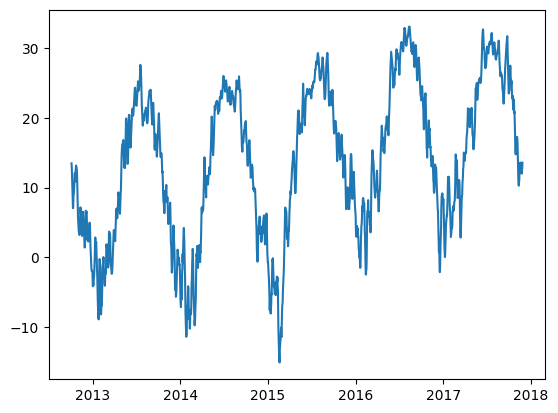

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose=seasonal_decompose(ts_data['temperature'])
plt.plot(decompose.trend)

ACF and PACF plots

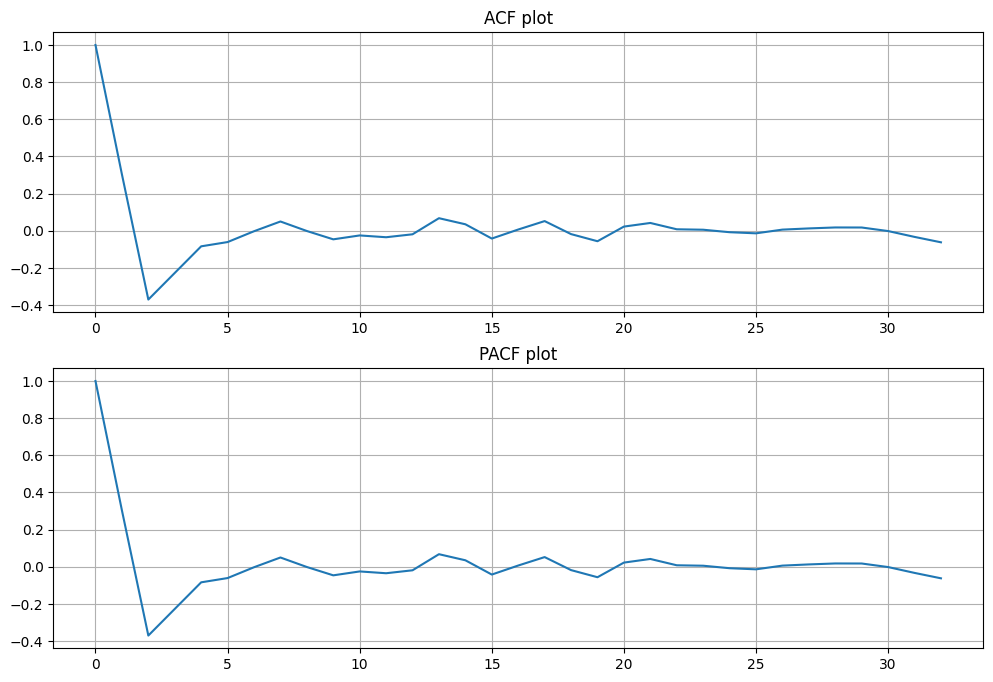

In [20]:
from statsmodels.tsa.stattools import acf,pacf
fig=plt.figure(figsize=(12,8))
acf_plot=acf(ts_data_new.dropna())
pacf_plot=pacf(ts_data_new.dropna())
ax1=fig.add_subplot(211)
ax1.set_title('ACF plot')
ax1.plot(acf_plot)
ax1.grid()
ax2=fig.add_subplot(212)
ax2.set_title('PACF plot')
ax2.plot(acf_plot)
ax2.grid()

In [21]:
ts_data_new.dropna(inplace=True)

ARIMA Model

In [22]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(ts_data,order=(2,2,1),seasonal_order=(2,2,1,12))
m_fit=model.fit()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [23]:
print(m_fit.summary())

                                    SARIMAX Results                                     
Dep. Variable:                      temperature   No. Observations:                 1886
Model:             ARIMA(2, 2, 1)x(2, 2, 1, 12)   Log Likelihood               -5542.595
Date:                          Sun, 16 Apr 2023   AIC                          11099.190
Time:                                  06:30:28   BIC                          11137.888
Sample:                              10-01-2012   HQIC                         11113.451
                                   - 11-29-2017                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1650      0.020     -8.270      0.000      -0.204      -0.126
ar.L2         -0.2471      0.019    -12.758      0.

Forecasting for the next 2 Years

In [24]:
res=m_fit.forecast(24)

In [25]:
res=pd.DataFrame(res)

In [26]:
res.rename(columns={'predicted_mean':'temperature'},inplace=True)

In [27]:
ts_pred=ts_data.append(res)

<ipython-input-27-02f7c464d6c1>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ts_pred=ts_data.append(res)


In [28]:
ts_pred

,temperature
2012-10-01,11.036840
2012-10-02,14.340558
2012-10-03,14.518382
2012-10-04,16.820351
2012-10-05,16.948431
...,...
2017-12-19,11.234094
2017-12-20,7.136864
2017-12-21,9.439988
2017-12-22,11.671943


Forecasted Values

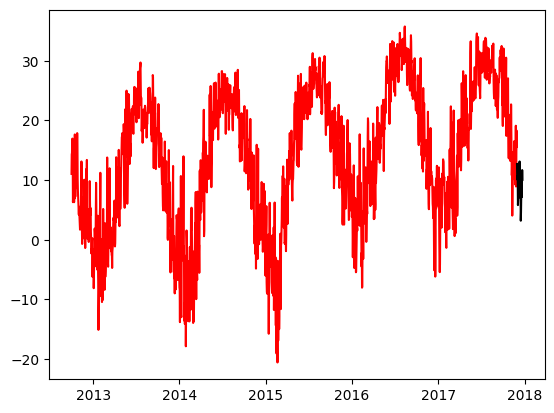

In [29]:
plt.plot(ts_data,c='red')
plt.plot(res,c='black')